In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

class MobiusStrip:
    def __init__(self, R=1.0, w=0.3, n=100):
        self.R = R
        self.w = w
        self.n = n
        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w/2, w/2, n)
        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self._compute_coordinates()

    def _compute_coordinates(self):
        U, V = self.U, self.V
        R = self.R
        X = (R + V * np.cos(U / 2)) * np.cos(U)
        Y = (R + V * np.cos(U / 2)) * np.sin(U)
        Z = V * np.sin(U / 2)
        return X, Y, Z

    def surface_area(self):
        """Approximate surface area using numerical integration."""
        du = self.u[1] - self.u[0]
        dv = self.v[1] - self.v[0]

        # Parametric partial derivatives
        dXdu = np.gradient(self.X, du, axis=1)
        dYdu = np.gradient(self.Y, du, axis=1)
        dZdu = np.gradient(self.Z, du, axis=1)

        dXdv = np.gradient(self.X, dv, axis=0)
        dYdv = np.gradient(self.Y, dv, axis=0)
        dZdv = np.gradient(self.Z, dv, axis=0)

        # Cross product of partial derivatives
        crossX = dYdu * dZdv - dZdu * dYdv
        crossY = dZdu * dXdv - dXdu * dZdv
        crossZ = dXdu * dYdv - dYdu * dXdv

        dA = np.sqrt(crossX**2 + crossY**2 + crossZ**2)
        surface_area = np.sum(dA) * du * dv
        return surface_area

    def edge_length(self):
        """Approximate edge length along boundary v = w/2."""
        R = self.R
        v = self.w / 2
        u = self.u

        x = (R + v * np.cos(u / 2)) * np.cos(u)
        y = (R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)

        dx = np.gradient(x, u)
        dy = np.gradient(y, u)
        dz = np.gradient(z, u)

        lengths = np.sqrt(dx**2 + dy**2 + dz**2)
        return np.sum(lengths) * (u[1] - u[0])

    def plot(self):
        """3D plot of the Möbius strip."""
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, rstride=2, cstride=2, cmap='viridis', edgecolor='k', alpha=0.8)
        ax.set_title("Möbius Strip")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()



Surface Area ≈ 1.9054
Edge Length ≈ 6.3316


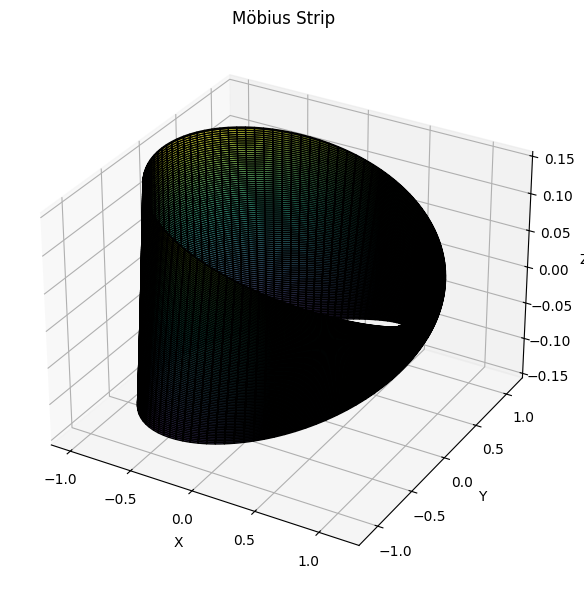

In [5]:
mobius = MobiusStrip(R=1.0, w=0.3, n=200)
print(f"Surface Area ≈ {mobius.surface_area():.4f}")
print(f"Edge Length ≈ {mobius.edge_length():.4f}")
mobius.plot()


In [6]:
plt.savefig("mobius_strip.png")  # Save as image
plt.show()


<Figure size 640x480 with 0 Axes>